# Digit Recognition Neural Network

## Introduction

Start here if you have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

In this notebook, I will build a digit recognition neural network from scratch, without using high-level libraries like Keras or TensorFlow. This approach will provide a deeper understanding of the underlying mechanics of neural networks and their application in computer vision.

## Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels that cover everything from regression to neural networks. I encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print((m,n))

(42000, 785)


# Train/test split

In [106]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]  # label
X_dev = data_dev[1:n]
X_dev = X_dev / 255.   #Normalization

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.


In [107]:
n_train,m_train = X_train.shape
print(n_train,m_train)

784 41000


# Build NN from Scratch

## Random Initialize parameters

In [108]:
def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (10, 784))
    b1 = np.random.uniform(-0.5, 0.5, (10, 1))
    W2 = np.random.uniform(-0.5, 0.5, (10, 10))
    b2 = np.random.uniform(-0.5, 0.5, (10, 1))
    return W1,b1,W2,b2

## RELU Activation Function

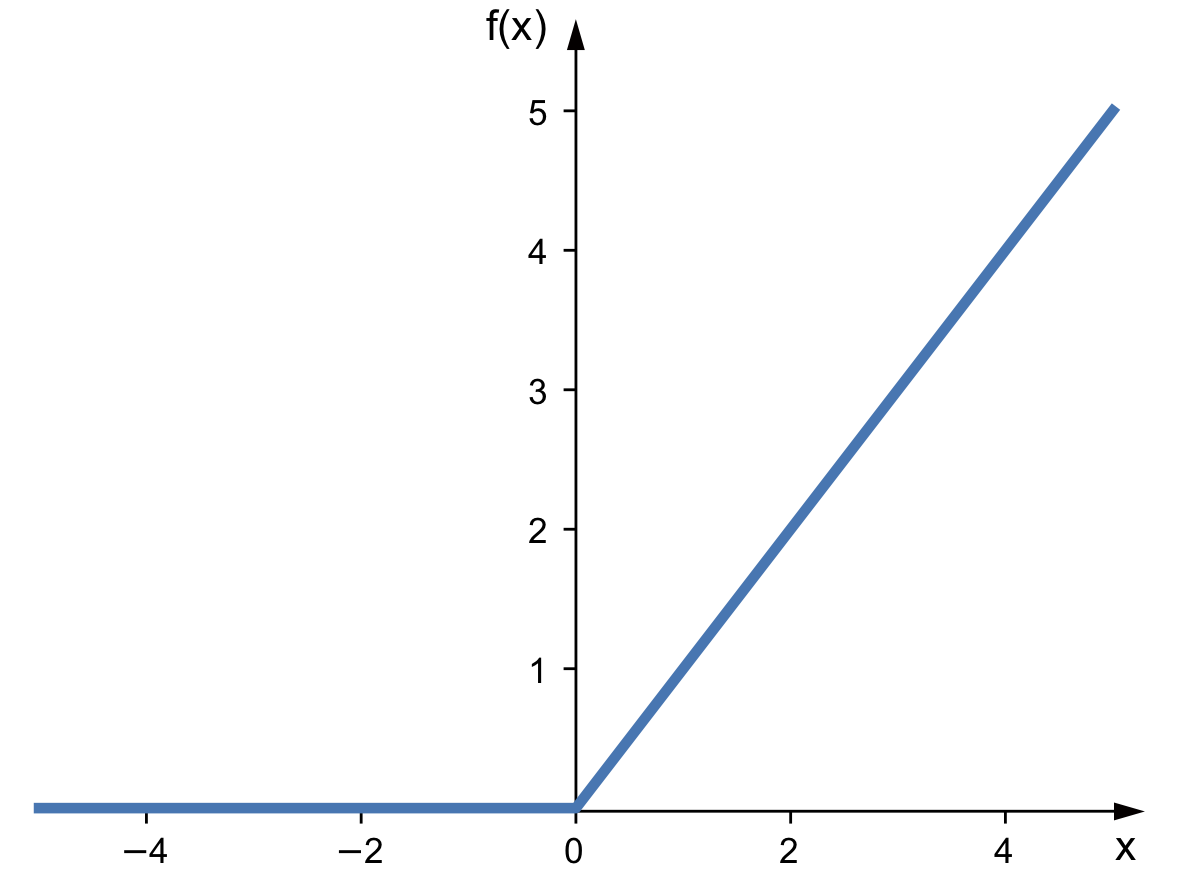

In [109]:
def Relu(z):
    return np.maximum(0,z)


## SoftMax Activation Function

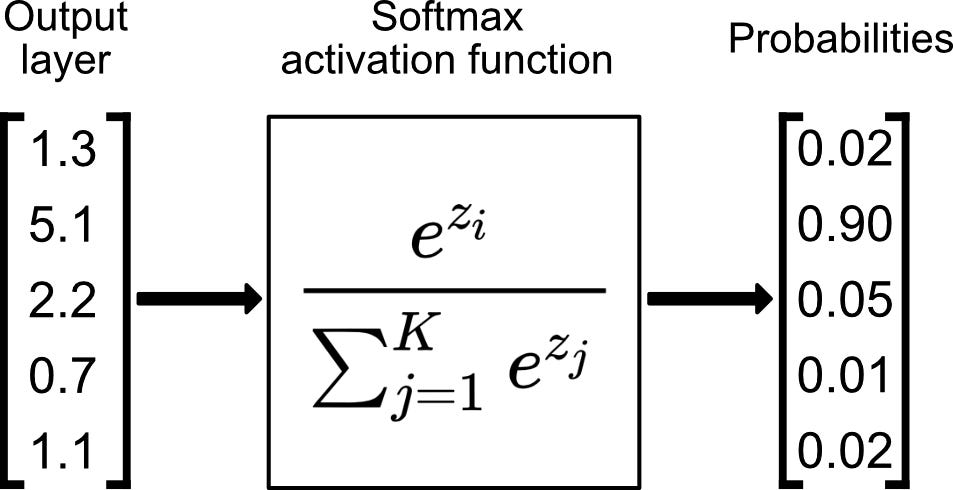

In [110]:
def Softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

## Forward Propagation

<p style="text-align: center;">
\( Z[1] = W[1]X + b[1] \)
</p>

<p style="text-align: center;">
\( A[1] = g_{\text{ReLU}}(Z[1]) \)
</p>

<p style="text-align: center;">
\( Z[2] = W[2]A[1] + b[2] \)
</p>

<p style="text-align: center;">
\( A[2] = g_{\text{softmax}}(Z[2]) \)
</p>


In [111]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2
    

### encode the label

In [112]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1)) #Y.size = m , Y.max + 1 = 9 +1
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Derivative of ReLU Function

The ReLU (Rectified Linear Unit) activation function is defined as:

\[
\text{ReLU}(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
x & \text{if } x \geq 0
\end{cases}
\]

The derivative of the ReLU function is:

\[
\text{ReLU}'(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0
\end{cases}
\]

Below is an illustration of the ReLU function's derivative:

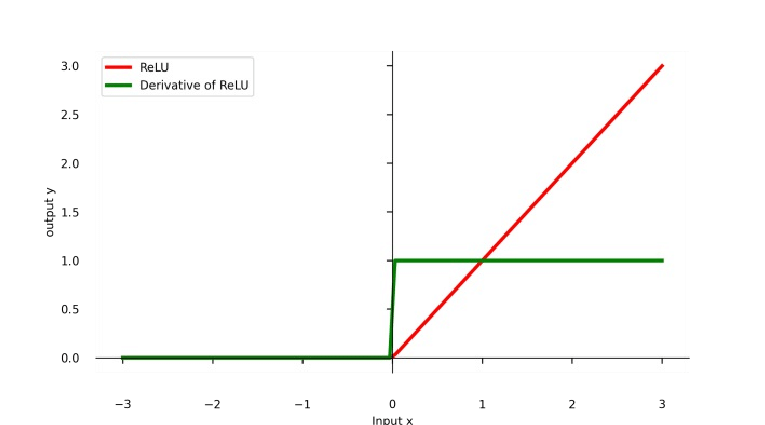

In [113]:
def deriv_Relu(Z):
    return Z > 0


## Backward Propagation

<p style="text-align: center;">
\( dZ[2] = A[2] - Y \)
</p>

<p style="text-align: center;">
\( dW[2] = \frac{1}{m} dZ[2] A[1]^T \)
</p>

<p style="text-align: center;">
\( dB[2] = \frac{1}{m} \sum dZ[2] \)
</p>

<p style="text-align: center;">
\( dZ[1] = W[2]^T dZ[2] \cdot g'[1](Z[1]) \)
</p>

<p style="text-align: center;">
\( dW[1] = \frac{1}{m} dZ[1] A[0]^T \)
</p>

<p style="text-align: center;">
\( dB[1] = \frac{1}{m} \sum dZ[1] \)
</p>


In [ ]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m =Y.size
    one_hot_Y= one_hot(Y)
    dz2 = A2 - one_hot_Y
    dw2 = 1 / m * dz2.dot(A1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = W2.T.dot(dz2) * deriv_Relu(Z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    
    return dw1 , db1 ,dw2,db2

In [114]:
def ubdate_params(W1, b1 , W2 ,b2 ,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1 , b1 ,W2 ,b2
    

In [115]:
def get_predictions(A2):
    return np.argmax(A2 , 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,iteration,alpha):
    W1 , b1 ,W2 ,b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2 = forward_prop(W1 , b1 ,W2 ,b2,X)
        dw1,db1 ,dw2,db2 = back_prop(Z1, A1, Z2, A2,W2,X,Y)
        W1 , b1 ,W2 ,b2 = ubdate_params(W1 , b1 ,W2 ,b2,dw1,db1 ,dw2,db2,alpha)
        if i % 10 == 0:
            print("iteration: ", i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return W1 , b1 ,W2 ,b2

# Train1  500 epoch 0.1 learning rate 

In [116]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,500,0.10)

iteration:  0
[4 8 7 ... 8 0 7] [2 1 0 ... 3 8 3]
Accuracy:  0.09490243902439024
iteration:  10
[4 8 2 ... 2 0 5] [2 1 0 ... 3 8 3]
Accuracy:  0.15439024390243902
iteration:  20
[3 8 2 ... 2 0 5] [2 1 0 ... 3 8 3]
Accuracy:  0.2403170731707317
iteration:  30
[3 1 2 ... 3 0 5] [2 1 0 ... 3 8 3]
Accuracy:  0.31958536585365854
iteration:  40
[3 1 2 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.3711951219512195
iteration:  50
[3 1 2 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.4066585365853658
iteration:  60
[3 1 2 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.44297560975609757
iteration:  70
[2 1 2 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.4794634146341463
iteration:  80
[2 1 2 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.5194390243902439
iteration:  90
[2 1 6 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.5595853658536586
iteration:  100
[2 1 6 ... 3 0 3] [2 1 0 ... 3 8 3]
Accuracy:  0.5910975609756097
iteration:  110
[2 1 6 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6148536585365854
iteration:  120
[2 1 6 

In [117]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


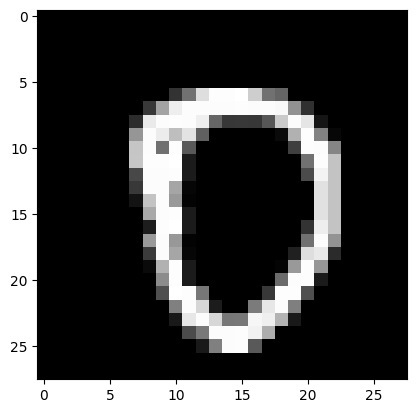

In [118]:
test_prediction(4,W1,b1,W2,b2)

Prediction:  [8]
Label:  8


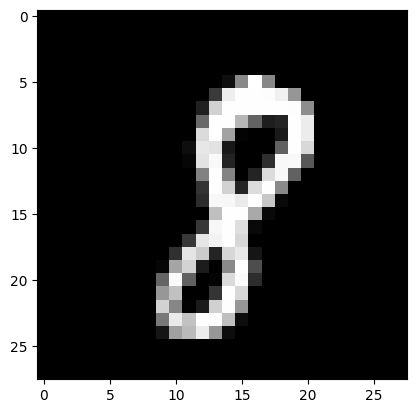

In [119]:
test_prediction(5,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


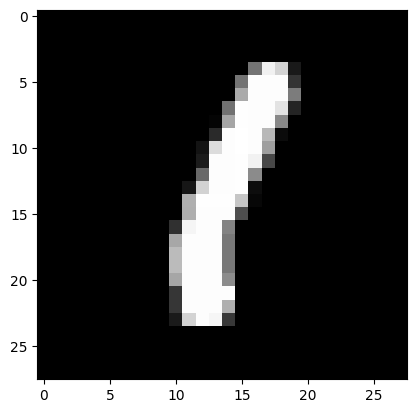

In [120]:
test_prediction(1,W1,b1,W2,b2)

Prediction:  [4]
Label:  4


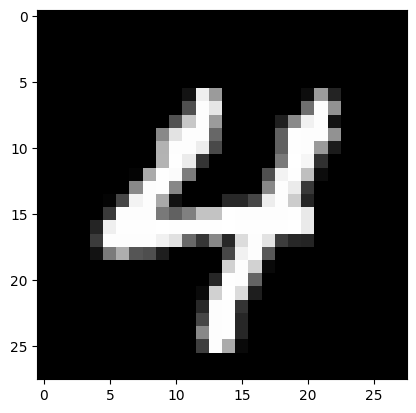

In [142]:
test_prediction(100,W1,b1,W2,b2)

Prediction:  [1]
Label:  1


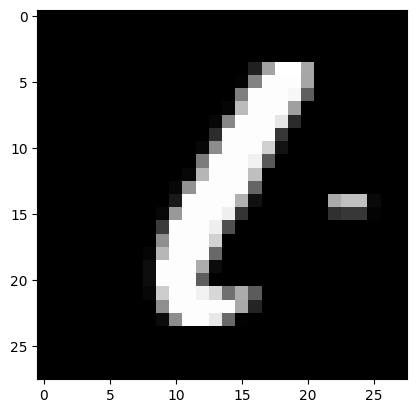

In [147]:
test_prediction(20,W1,b1,W2,b2)

Prediction:  [2]
Label:  3


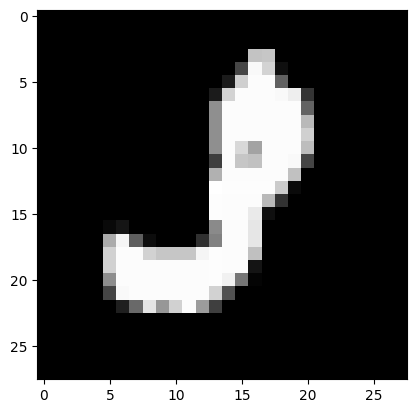

In [143]:
test_prediction(200,W1,b1,W2,b2)

## train 1 accuracy 84%

In [130]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 2 3 9 8 8 4 4 1 7 4 7 4 6 6 6 0 6 3 2 7 9 0 7 8 5 7 9 7 9 4 8 0 4 1 1 0
 5 4 1 8 8 3 5 9 0 1 0 7 3 1 6 7 6 6 9 8 0 2 6 9 3 1 5 4 4 0 6 7 0 7 4 3 8
 4 5 9 4 2 6 3 4 5 4 1 8 8 3 1 0 7 3 0 5 9 3 4 3 7 8 9 4 0 3 2 0 9 6 2 7 5
 8 7 3 9 2 6 3 2 7 8 0 7 0 4 2 1 2 3 5 4 2 9 2 8 4 0 7 9 6 2 2 3 0 8 4 7 1
 6 3 6 8 5 2 6 7 8 1 0 0 9 7 0 4 5 0 2 1 9 5 3 6 0 5 7 0 6 7 9 9 9 3 8 3 7
 0 2 7 3 1 6 4 9 4 1 5 7 7 0 7 3 9 7 5 7 5 4 4 7 3 8 6 4 9 2 9 6 8 1 7 6 1
 4 6 2 4 5 9 1 4 4 4 7 4 6 0 8 5 2 1 6 3 3 9 1 1 1 6 8 2 8 1 1 7 7 1 3 6 8
 4 8 8 6 7 2 3 6 0 0 3 2 9 6 8 9 1 9 3 1 5 8 1 6 7 1 3 1 1 4 5 4 4 2 6 1 4
 1 6 7 5 7 4 8 0 8 9 0 9 8 8 6 2 7 0 9 1 3 9 8 5 7 3 3 5 8 9 6 8 8 5 5 8 1
 5 7 7 2 3 6 7 8 4 8 3 0 3 1 3 0 0 7 0 5 6 9 4 0 3 6 5 5 9 4 7 9 0 8 0 4 2
 0 2 0 2 5 8 7 3 8 7 3 4 1 1 7 2 3 7 9 5 7 7 1 6 4 1 7 2 9 3 4 8 4 4 5 3 9
 8 3 2 1 4 9 0 4 6 1 1 3 5 7 7 0 3 0 6 4 6 9 9 7 1 7 5 0 9 6 5 1 0 3 2 2 7
 9 8 9 3 1 8 0 7 5 5 0 8 2 0 0 9 9 0 6 7 1 3 6 8 1 3 3 0 4 2 1 4 3 6 5 1 6
 2 1 0 4 5 3 2 4 9 2 1 0 

0.846

# Train 2 learning rate 0.1 epochs 1500

In [124]:
W12, b12, W22, b22 = gradient_descent(X_train, Y_train,1500,0.10)

iteration:  0
[3 3 5 ... 3 3 7] [2 1 0 ... 3 8 3]
Accuracy:  0.09546341463414634
iteration:  10
[3 3 5 ... 3 0 7] [2 1 0 ... 3 8 3]
Accuracy:  0.1615609756097561
iteration:  20
[7 3 0 ... 3 0 7] [2 1 0 ... 3 8 3]
Accuracy:  0.24890243902439024
iteration:  30
[7 3 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.31226829268292683
iteration:  40
[6 3 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.3603170731707317
iteration:  50
[6 3 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.42878048780487804
iteration:  60
[6 3 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.5035365853658537
iteration:  70
[6 1 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.5597073170731708
iteration:  80
[6 1 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6042195121951219
iteration:  90
[6 1 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6395365853658537
iteration:  100
[6 1 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6671707317073171
iteration:  110
[2 1 0 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6893658536585365
iteration:  120
[2 1 0 

Prediction:  [9]
Label:  9


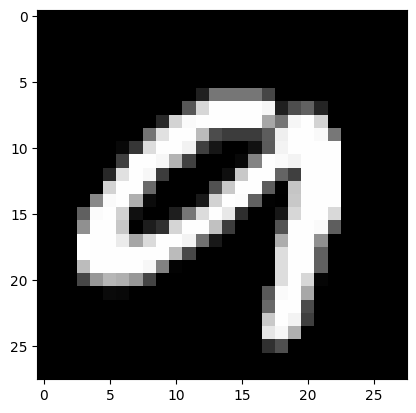

In [149]:
test_prediction(650,W12,b12,W22,b22)

Prediction:  [2]
Label:  3


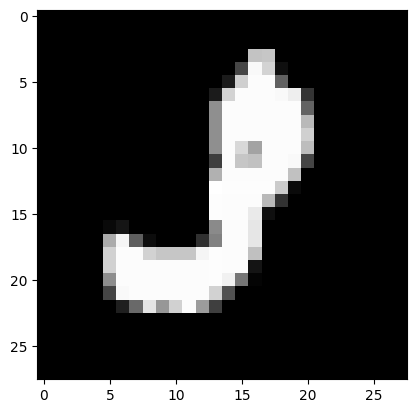

In [141]:
test_prediction(200,W12,b12,W22,b22)

## train 2 accuracy 88.7% 

In [128]:
dev_predictions = make_predictions(X_dev, W12, b12, W22, b22)
get_accuracy(dev_predictions, Y_dev)

[4 2 3 9 8 8 9 4 1 7 4 7 4 2 0 2 0 6 3 6 7 9 0 7 1 5 7 9 7 9 4 8 0 4 1 1 0
 5 4 1 3 8 9 5 9 0 1 0 2 3 1 6 7 6 6 9 8 0 2 6 9 3 1 0 4 4 6 4 7 0 7 4 3 8
 4 5 9 4 2 6 3 4 5 4 1 8 5 3 8 0 7 3 0 5 9 3 4 3 7 8 9 4 0 3 2 0 9 6 2 9 5
 8 7 3 9 2 6 3 2 7 8 0 7 0 4 2 1 2 5 5 9 2 9 2 8 4 0 7 9 6 3 2 3 0 8 4 7 1
 8 3 6 8 5 6 6 9 8 1 0 0 9 7 0 4 8 0 0 1 9 5 3 5 0 5 7 0 6 7 9 9 9 3 8 3 7
 0 2 7 3 1 6 4 9 4 1 5 7 7 0 7 3 9 7 5 7 8 4 4 7 3 8 6 4 9 2 9 6 8 9 7 6 1
 4 6 2 8 5 9 1 4 4 9 7 9 6 0 8 5 2 1 6 3 2 9 1 1 1 8 8 2 8 1 1 7 7 1 3 6 8
 4 8 8 4 7 6 9 6 0 0 3 2 9 6 8 9 1 8 3 1 5 8 1 2 7 1 7 1 2 9 0 4 4 2 6 1 4
 6 6 7 5 7 4 8 2 3 9 0 2 8 8 6 2 7 0 7 1 3 9 8 5 7 3 3 5 8 5 6 8 8 5 5 8 1
 5 7 7 2 3 6 7 8 4 1 3 0 3 1 3 0 0 7 0 5 6 9 4 0 3 6 5 3 9 4 7 7 0 8 0 4 2
 0 2 0 2 5 5 7 3 3 8 3 4 1 1 7 2 3 7 9 0 7 7 1 6 9 1 7 2 5 3 4 8 4 4 5 3 9
 8 3 1 7 4 1 0 4 6 1 1 3 5 7 7 0 3 0 6 9 6 9 9 2 1 7 5 0 9 6 3 1 0 3 2 2 7
 9 8 7 3 1 8 0 7 5 5 0 8 2 0 0 4 4 0 6 7 1 3 6 8 1 8 3 5 4 1 1 4 3 6 5 1 6
 2 1 0 4 5 3 2 4 7 2 1 0 

0.887

# train 3 learning rate 0.4 epochs 600

In [134]:
W13, b13, W23, b23 = gradient_descent(X_train, Y_train,600,0.4)

iteration:  0
[9 9 5 ... 3 5 3] [2 1 0 ... 3 8 3]
Accuracy:  0.1651219512195122
iteration:  10
[1 1 0 ... 3 6 3] [2 1 0 ... 3 8 3]
Accuracy:  0.43746341463414634
iteration:  20
[1 1 0 ... 3 6 3] [2 1 0 ... 3 8 3]
Accuracy:  0.617390243902439
iteration:  30
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6996097560975609
iteration:  40
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.6739268292682927
iteration:  50
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.726170731707317
iteration:  60
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.7434878048780488
iteration:  70
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.7731951219512195
iteration:  80
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.7906585365853659
iteration:  90
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.8043902439024391
iteration:  100
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.8150487804878048
iteration:  110
[1 1 0 ... 3 8 3] [2 1 0 ... 3 8 3]
Accuracy:  0.8230487804878048
iteration:  120
[1 1 0 ... 3

## train 3 accurcy 90.5%

In [135]:
dev_predictions = make_predictions(X_dev, W13, b13, W23, b23)
get_accuracy(dev_predictions, Y_dev)

[4 2 3 9 8 8 9 4 1 7 4 7 4 2 6 6 0 6 3 6 7 9 0 7 1 5 7 9 7 9 4 4 0 4 1 1 0
 5 4 1 3 8 3 5 9 0 1 0 2 3 1 6 7 6 6 9 8 0 2 6 9 3 1 0 4 4 6 4 7 0 7 4 3 8
 4 5 9 4 2 6 3 4 5 4 1 8 5 3 8 0 7 3 0 5 9 3 4 3 7 8 9 4 0 3 2 0 9 6 2 9 5
 8 7 3 9 3 6 3 2 7 8 0 7 0 4 2 1 2 3 5 9 2 9 2 8 4 0 7 9 6 3 2 3 0 8 4 7 1
 6 3 6 8 5 6 7 9 8 1 0 0 4 7 0 4 8 0 2 1 9 5 3 5 0 5 7 0 6 7 9 9 9 3 8 3 7
 0 2 7 3 1 6 4 9 4 1 5 7 7 0 7 3 9 7 5 7 5 4 4 7 3 8 6 4 9 2 9 6 8 9 7 6 1
 4 6 2 8 5 9 1 4 4 4 7 9 6 0 8 5 2 8 6 3 2 9 1 1 1 2 8 2 8 1 1 7 7 1 3 6 8
 4 8 8 6 7 2 3 6 0 0 3 2 9 6 4 9 1 2 3 1 5 8 1 2 7 1 9 1 3 9 0 4 9 2 6 1 4
 8 6 7 5 7 4 1 0 8 9 0 2 8 8 6 2 7 0 9 1 3 9 8 5 7 3 3 5 8 8 6 8 8 5 5 8 1
 5 7 7 2 3 6 7 8 4 1 3 0 3 1 3 0 0 7 0 5 6 9 4 0 3 6 5 5 9 4 7 9 0 8 0 4 2
 0 7 0 2 5 8 7 3 3 7 3 4 1 1 7 2 3 7 9 0 7 7 1 6 7 1 7 2 8 3 4 8 4 4 5 3 9
 9 3 1 1 4 1 0 4 6 1 1 3 5 7 7 0 3 0 6 4 6 4 9 6 1 7 5 0 9 6 5 1 0 3 2 2 7
 9 8 9 2 1 5 2 7 5 5 0 8 2 0 0 4 4 0 6 7 1 3 6 8 1 8 5 0 9 1 1 4 3 6 5 1 6
 2 1 0 4 5 3 2 4 7 2 1 0 

0.905

Prediction:  [8]
Label:  8


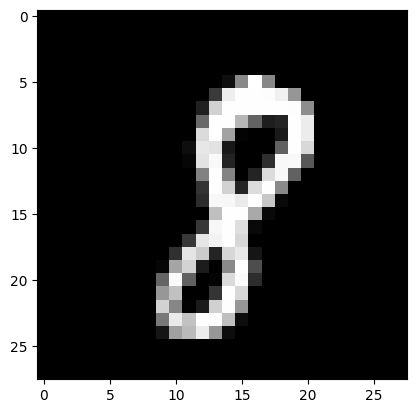

In [137]:
test_prediction(5,W13,b13,W23,b23)

Prediction:  [3]
Label:  3


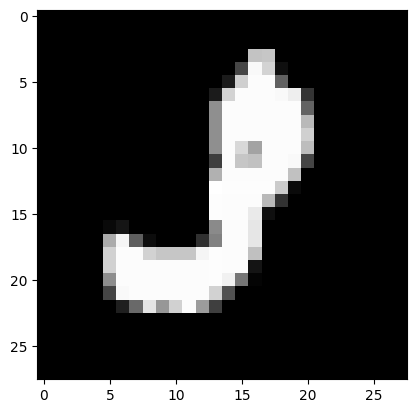

In [140]:
test_prediction(200,W13,b13,W23,b23)